In [2]:
from fastai.vision import *
import numpy as np

In [3]:
classes = ['dendrite', 'non_dendrite']

In [4]:
# data from 

path = Path('/users/wd15/git/image_analysis_toolbox/matsc_dataset1')

for class_name in classes:
    verify_images(path/class_name, delete=True)
    

In [5]:
# If size > 60 things seem to go really slowly

np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=60, num_workers=10).normalize(imagenet_stats)

In [6]:
data.classes

['dendrite', 'non_dendrite']

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dendrite', 'non_dendrite'], 2, 459, 114)

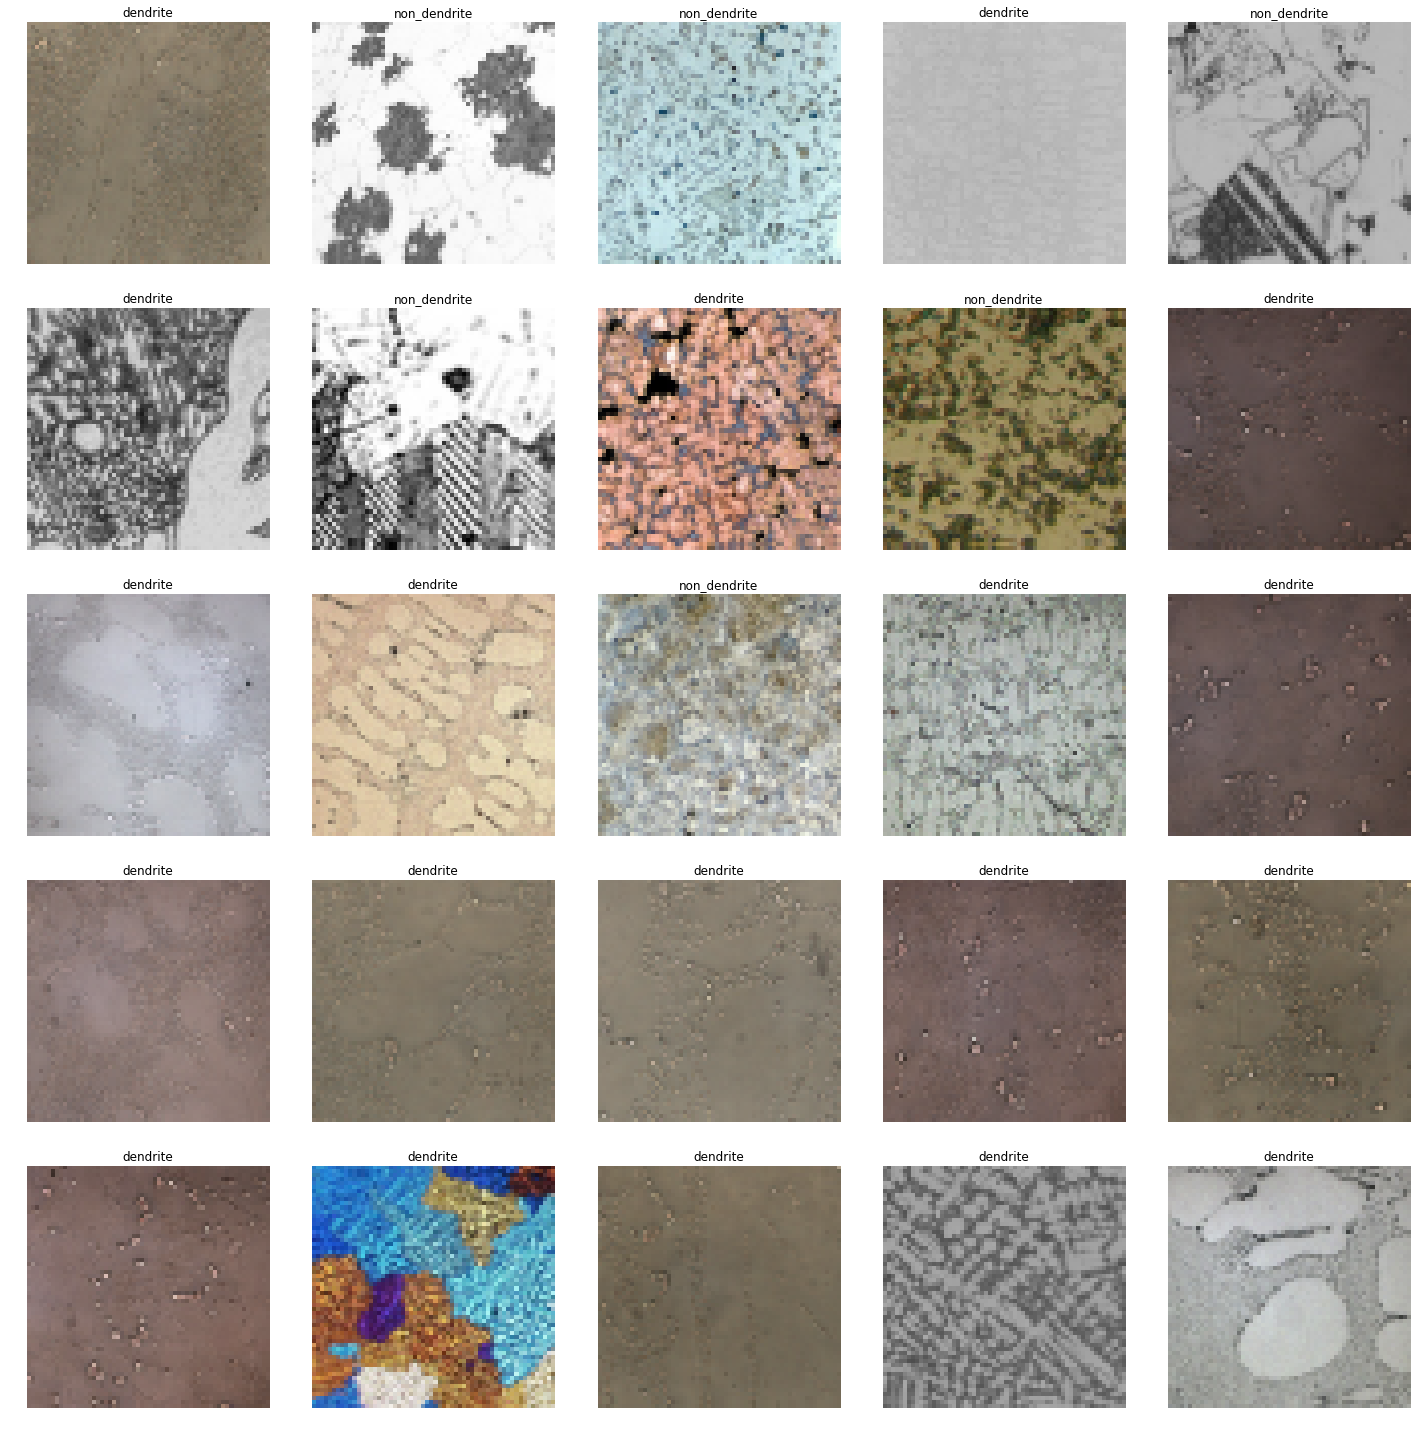

In [8]:
data.show_batch()

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.876687,0.458885,0.219298,00:04
1,0.689166,0.278161,0.096491,00:02
2,0.584463,0.274616,0.114035,00:02
3,0.528039,0.287316,0.114035,00:02


In [11]:
learn.save('stage-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


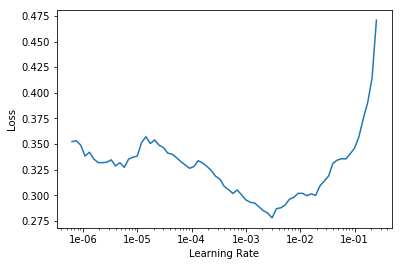

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.454315,0.260813,0.087719,00:02
1,0.322734,0.224043,0.070175,00:02


In [17]:
learn.save('stage-2');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

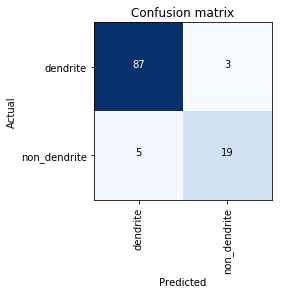

In [19]:
interp.plot_confusion_matrix()